In [1]:
# Import libraries
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create

# read in the data

df = pd.read_csv('D:\Chrome Downloads\movies.csv\movies.csv')

In [2]:
# let's take a glance of the data
df.head()
# check the columns
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [18]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
#check for duplicates
df.duplicated(subset =['name','released']).sum()

0

In [11]:
# count  NULL values in each column
import numpy as np
for col in df.columns:
    missing_ct = df[col].isnull().sum()
    print('{} - {}'.format(col,missing_ct))

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


In [5]:
# drop all the null values
df.dropna(inplace = True,axis = 0)
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [30]:
#pd.set_option('display.max_rows', None)

In [6]:
# change the float64 to int
df.loc[:,['budget','gross','votes','runtime']] = df.loc[:,['budget','gross','votes','runtime']].applymap(int)

In [7]:
df['released_day'] = df.released.str.split('(', expand = True).loc[:,0]

In [8]:
df['released_country'] = df.released.str.split('(',expand = True).loc[:,1].str.replace(')','')

C:\Users\PC\AppData\Local\Temp/ipykernel_4796/879370869.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['released_country'] = df.released.str.split('(',expand = True).loc[:,1].str.replace(')','')


In [9]:
df.dtypes

name                 object
rating               object
genre                object
year                  int64
released             object
score               float64
votes                 int64
director             object
writer               object
star                 object
country              object
budget                int64
gross                 int64
company              object
runtime               int64
released_day         object
released_country     object
dtype: object

In [10]:
df.drop(columns = 'released', inplace = True)

In [11]:
df['released_day'] = pd.to_datetime(df.released_day)

In [12]:
df.dtypes

name                        object
rating                      object
genre                       object
year                         int64
score                      float64
votes                        int64
director                    object
writer                      object
star                        object
country                     object
budget                       int64
gross                        int64
company                     object
runtime                      int64
released_day        datetime64[ns]
released_country            object
dtype: object

<AxesSubplot:xlabel='budget', ylabel='gross'>

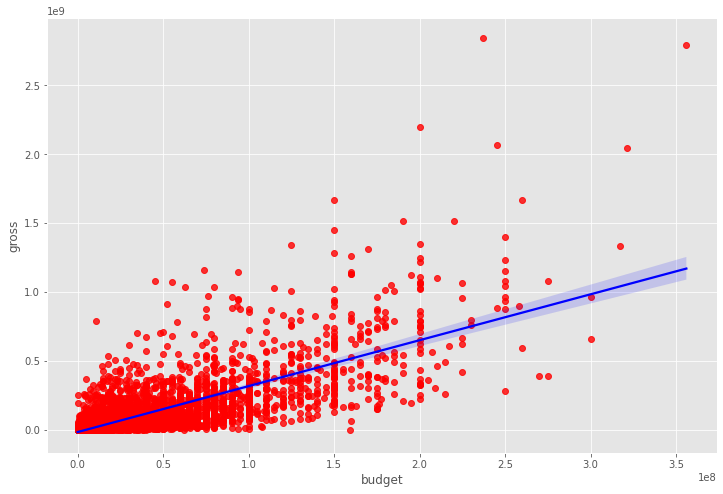

In [17]:
# plot budget vs gross  using seaborn
sns.regplot(x = 'budget',y= 'gross',data=df,scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})

In [18]:
# let's look at the correlation
df.corr() # it only shows the correlation of numerical columns

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


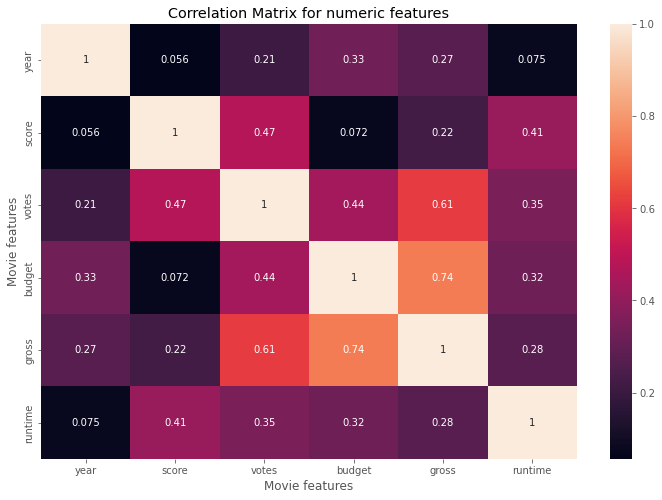

In [22]:
# creating a correlation heatmap
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [39]:
# turning some non-numeric columns into category 

In [43]:
df['rating'] =df.rating.astype('category').cat.codes
df['genre'] =df.genre.astype('category').cat.codes
df['country'] =df.country.astype('category').cat.codes
df['company'] =df.company.astype('category').cat.codes

In [44]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_day,released_country
0,The Shining,6,6,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,46,19000000,46998772,1426,146,1980-06-13,United States
1,The Blue Lagoon,6,1,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,47,4500000,58853106,452,104,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,4,0,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,47,18000000,538375067,945,124,1980-06-20,United States
3,Airplane!,4,4,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,47,3500000,83453539,1108,88,1980-07-02,United States
4,Caddyshack,6,4,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,47,6000000,39846344,1083,98,1980-07-25,United States


In [ ]:
# do the heatmap again

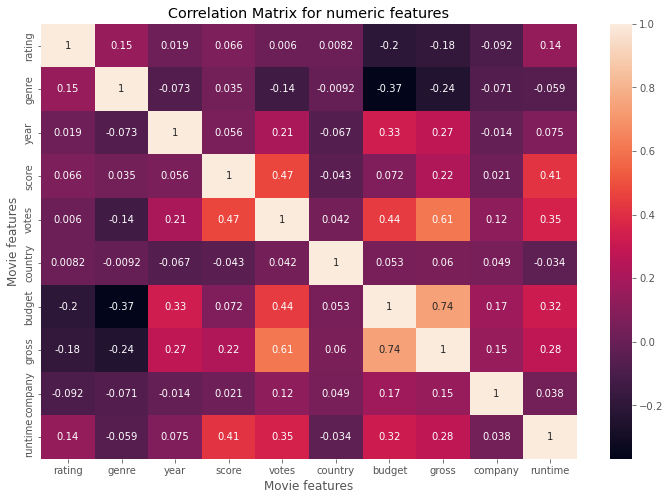

In [45]:
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [50]:
#using the following code the check the correlationship between gross and other features
df.corr().unstack().gross.sort_values()

genre     -0.244101
rating    -0.181906
country    0.060078
company    0.149553
score      0.222556
year       0.274321
runtime    0.275796
votes      0.614751
budget     0.740247
gross      1.000000
dtype: float64

In [58]:
df.corr().unstack().sort_values()

genre    budget    -0.368523
budget   genre     -0.368523
genre    gross     -0.244101
gross    genre     -0.244101
rating   budget    -0.203946
                      ...   
score    score      1.000000
year     year       1.000000
genre    genre      1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 100, dtype: float64